<a href="https://colab.research.google.com/github/Abhishek-xavi/DataScienceProjects/blob/main/EDA_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Connecting to Kaggle Dataset
!pip install kaggle
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [3]:
#Downloading the datset from Kaggle
!kaggle datasets download therohk/million-headlines

 24% 5.00M/21.1M [00:00<00:00, 39.1MB/s]
100% 21.1M/21.1M [00:00<00:00, 83.7MB/s]


In [4]:
#Unzipping the Dataset
!unzip million-headlines.zip

Archive:  million-headlines.zip
  inflating: abcnews-date-text.csv   


In [7]:
#Installing Libraries
!pip install \pandas matplot numpy \
  nltk seaborn sklearn gensim pyldavis \
  wordcloud textblob spacy textstat

     |████████████████████████████████| 1.7 MB 5.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 101 kB 10.8 MB/s 
     |████████████████████████████████| 60 kB 7.2 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
     |████████████████████████████████| 15.7 MB 56 kB/s 
     |████████████████████████████████| 11.3 MB 43.8 MB/s 
     |████████████████████████████████| 2.0 MB 43.4 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 3.5 MB 36.2 MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=7a378e8d6d372499a0f59b7b059ea041bc448781503efa6f38e0b1529a74c44d
  Stored in directory: /root/.cache/pip/wheel

In [19]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import nltk
from collections import  Counter
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [6]:
news= pd.read_csv('/content/abcnews-date-text.csv',nrows=10000)
news.head(3)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit


We shall explore the first 10000 rows from 19th Feb to 7th April
First we will run a statistical analysis on the text. This will include,
*   Word frequency
*   Sentence length
*   Average word length

Here we will be using histograms(For continuous data) and bar charts(Categorical data)




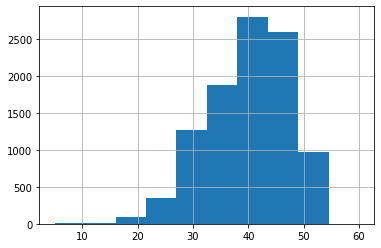

In [7]:
#Number of characters in each headline
news['headline_text'].str.len().hist()

This chart tells us that we have upto 65 characters in a sentence. And on an average the sentences are 38-48 characters long.

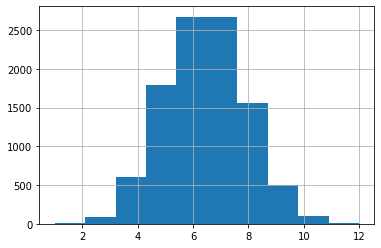

In [10]:
#Exploring the number of words in each news headlines
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
plot_word_number_histogram(news['headline_text'])

From the above histogram we understand that there are roughly 3-10 words per headlines. With 6-8 words being average.

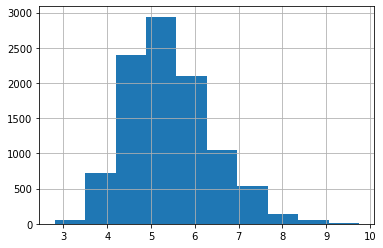

In [13]:
#Explore the average word length in every headline.
news['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

We can observe that average word count varies from 3 to 6.
Lets understand further as to if there are stop words being used here like a, an , the, etc.
For this corpus of stopwords we need the nltk library.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

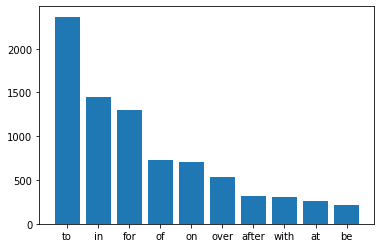

In [21]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))
corpus = []
new = news['headline_text'].str.split()
new = new.values.tolist()
#Nested for loop. This is equivalent to - i in new: word in i: word.
#Basically new has every headline. We iterate over every headline with i and the iterate for every word in i
#with the variable word and use that variable. Now corpus has a list of words.
corpus = [word for i in new for word in i]

dic = defaultdict(int)
for word in corpus:
  if word in stop:
    dic[word] += 1

top = sorted(dic.items(), key = lambda x:x[1], reverse=True)[:10]
x,y = zip(*top)
plt.bar(x,y)


We can observe news headlines have a lot of - 'to, in, for'.
Lets see which other non stopword, words top the list.